In [53]:


import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, zscore, norm, probplot
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
classification = {
    'Title': 'Nominal',  #Title serves as a label for all the movies hence nominal
    'Year': 'Interval',  #Year is usually written in the format *2000 -2001* hence interval, but its just a single year here, but for now lets consider it interval of a whole year
    'Age': 'Ordinal',  #Age has an order
    #Any of the below ratings are interval, they are scored in a range all time, either 0-1 or 0-100 or percentage
    'IMDb': 'Interval', 
    'Rotten Tomatoes': 'Interval',  
    #These are showing the availabaility of that respective content on the platform so nominal, 0- No; 1 -Yes
    'Netflix': 'Nominal',  
    'Hulu': 'Nominal', 
    'Prime Video': 'Nominal', 
    'Disney+': 'Nominal' 
}


for column, dtype in classification.items():
    print(f'{column}: {dtype}')


data = pd.read_csv('dataset.csv')

duplicates = data.duplicated()
print(duplicates)

data.drop_duplicates(inplace=True)
data.drop(columns=['Unnamed: 0'], inplace=True)
data.dropna(inplace=True)
data.head()

Title: Nominal
Year: Interval
Age: Ordinal
IMDb: Interval
Rotten Tomatoes: Interval
Netflix: Nominal
Hulu: Nominal
Prime Video: Nominal
Disney+: Nominal
0      False
1      False
2      False
3      False
4      False
       ...  
506    False
507    False
508    False
509    False
510    False
Length: 511, dtype: bool


,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0
2,Money Heist,2017,18+,8.4,91%,1,0,0,0
3,Sherlock,2010,16+,9.1,78%,1,0,0,0
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0


In [55]:
# Preprocessing Rotten tomatoes to integers
data['Rotten Tomatoes'] = data['Rotten Tomatoes'].str.replace('%', '').astype(int)

data.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18+,9.5,96,1,0,0,0
1,Stranger Things,2016,16+,8.8,93,1,0,0,0
2,Money Heist,2017,18+,8.4,91,1,0,0,0
3,Sherlock,2010,16+,9.1,78,1,0,0,0
4,Better Call Saul,2015,18+,8.7,97,1,0,0,0


In [56]:
# Unique values in Age
print(data['Age'].unique())

# the types are 18+, 16+, 7+ and all, 

['18+' '16+' '7+' 'all']


Q3. Provide summary statistics for the numerical features, focusing on central tendency and dispersion. Calculate measures such as mean, median, and standard deviation for IMDb ratings and Rotten Tomatoes scores.

In [57]:
# Question 3
summary_stats = data[['IMDb', 'Rotten Tomatoes']].describe()
print(summary_stats)

             IMDb  Rotten Tomatoes
count  341.000000       341.000000
mean     7.807038        82.448680
std      0.648671        17.179361
min      5.800000        11.000000
25%      7.400000        75.000000
50%      7.900000        87.000000
75%      8.300000        95.000000
max      9.500000       100.000000


4. Visualizations: Create histograms and box plots to explore the distributions of IMDb ratings and Rotten Tomatoes scores in the TV show dataset.
- Describe the distribution shape (e.g., normal, skewed) for both IMDb and Rotten Tomatoes ratings.
- Calculate the number of outliers present in each rating column.
- Bonus: Adjust the visual scale, if necessary, to enhance the clarity of the distributions and outlier representation

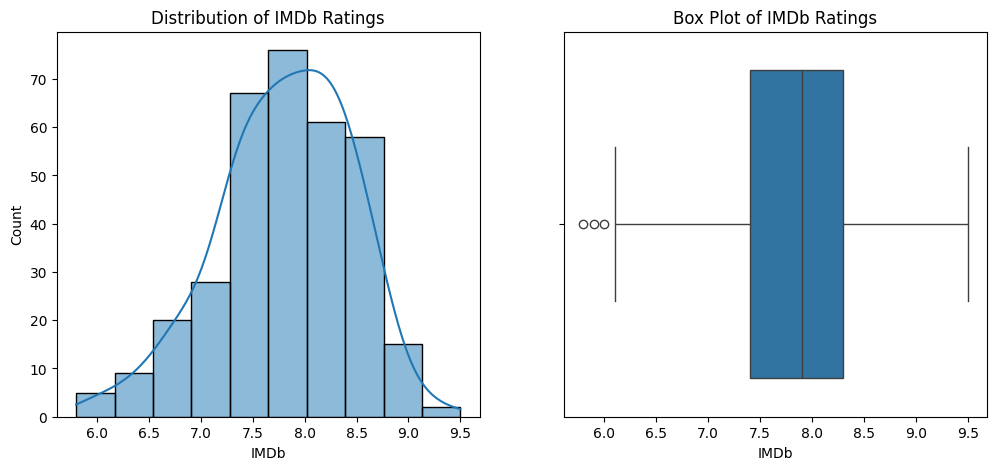

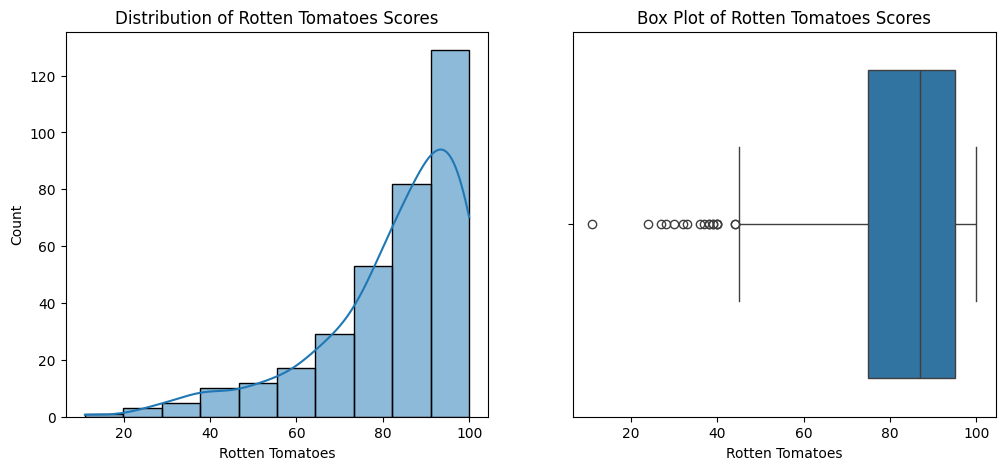

In [58]:
# Describe the distribution shape (e.g., normal, skewed) for both
# IMDb and Rotten Tomatoes ratings.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['IMDb'], bins=10, kde=True)
plt.title('Distribution of IMDb Ratings')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['IMDb'])
plt.title('Box Plot of IMDb Ratings')

plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Rotten Tomatoes'], bins=10, kde=True)
plt.title('Distribution of Rotten Tomatoes Scores')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Rotten Tomatoes'])
plt.title('Box Plot of Rotten Tomatoes Scores')

plt.show()

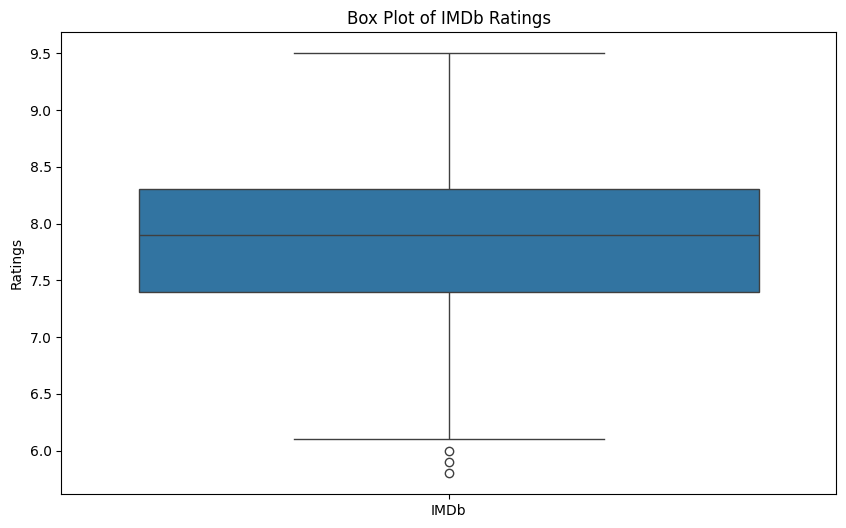

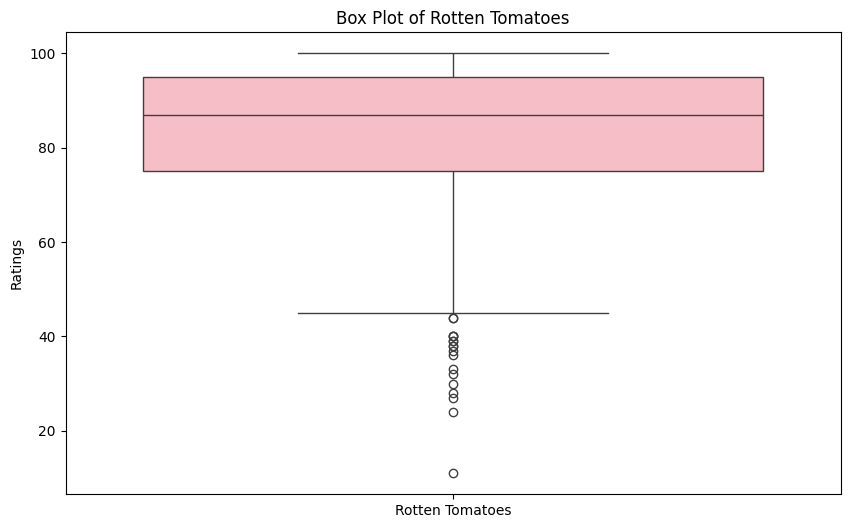

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['IMDb']])
plt.title('Box Plot of IMDb Ratings')
plt.ylabel('Ratings')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Rotten Tomatoes']], color='lightpink')
plt.title('Box Plot of Rotten Tomatoes')
plt.ylabel('Ratings')
plt.show()

In [60]:
#  Calculate the number of outliers present in each rating
# column.
import pprint

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
imdb_iqr = data['IMDb'].quantile(0.75) - data['IMDb'].quantile(0.25)
rotten_tomatoes_iqr = data['Rotten Tomatoes'].quantile(0.75) - data['Rotten Tomatoes'].quantile(0.25)

analysis = {}

for column in data.columns[3:5]:
    iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    min_bp = data[column].quantile(0.25) - 1.5 * iqr
    max_bp = data[column].quantile(0.75) + 1.5 * iqr

    outliers = data[(data[column] < min_bp) | (data[column] > max_bp)]

    analysis[column] = {
        "min": float(min_bp),
        "max": float(max_bp),
        "outliers": len(outliers),
    }

pprint.pp(analysis)

{'IMDb': {'min': 6.05, 'max': 9.650000000000002, 'outliers': 3},
 'Rotten Tomatoes': {'min': 45.0, 'max': 125.0, 'outliers': 18}}


In [61]:
# Remove outliers based on the analysis dictionary
filtered_data = data[
    (data['IMDb'] >= analysis['IMDb']['min']) & (data['IMDb'] <= analysis['IMDb']['max']) &
    (data['Rotten Tomatoes'] >= analysis['Rotten Tomatoes']['min']) & (data['Rotten Tomatoes'] <= analysis['Rotten Tomatoes']['max'])
]

filtered_data.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18+,9.5,96,1,0,0,0
1,Stranger Things,2016,16+,8.8,93,1,0,0,0
2,Money Heist,2017,18+,8.4,91,1,0,0,0
3,Sherlock,2010,16+,9.1,78,1,0,0,0
4,Better Call Saul,2015,18+,8.7,97,1,0,0,0


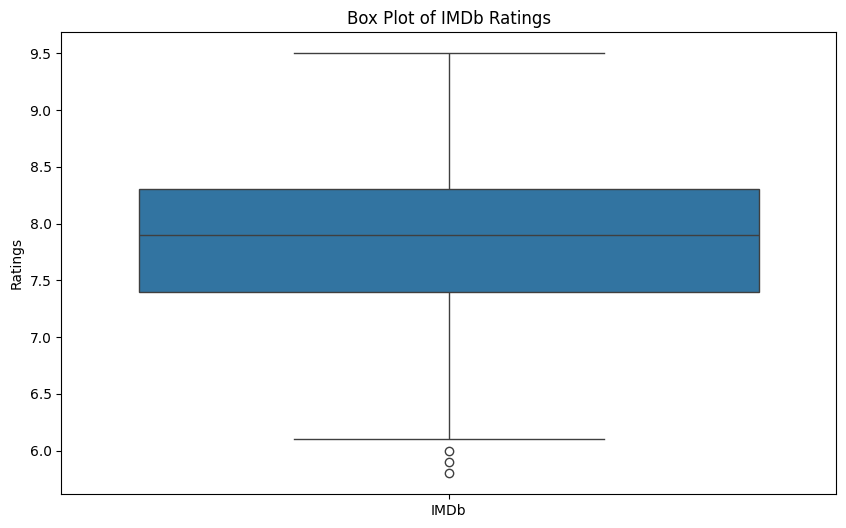

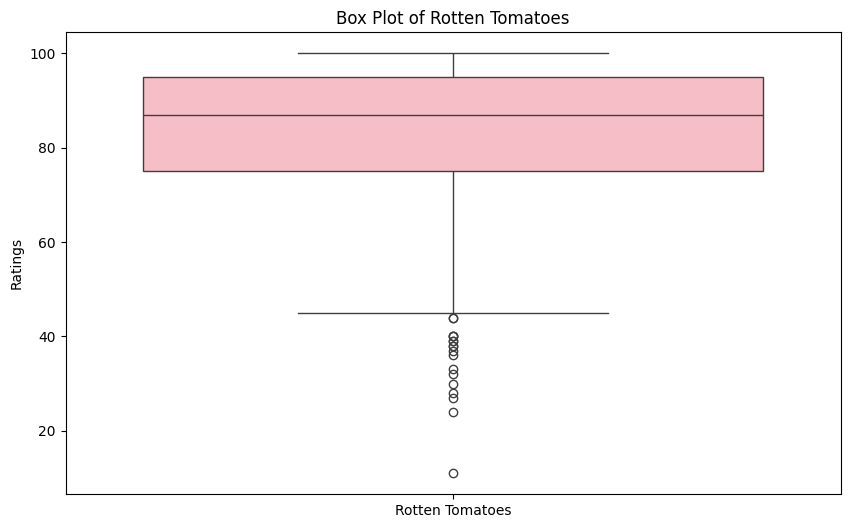

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['IMDb']])
plt.title('Box Plot of IMDb Ratings')
plt.ylabel('Ratings')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Rotten Tomatoes']], color='lightpink')
plt.title('Box Plot of Rotten Tomatoes')
plt.ylabel('Ratings')
plt.show()

6. Normal Probability Plot (Q-Q Plot): Create and interpret a Q-Q plot for IMDb ratings. Based on the plot shape, describe any conclusions you can draw regarding the distribution of ratings.

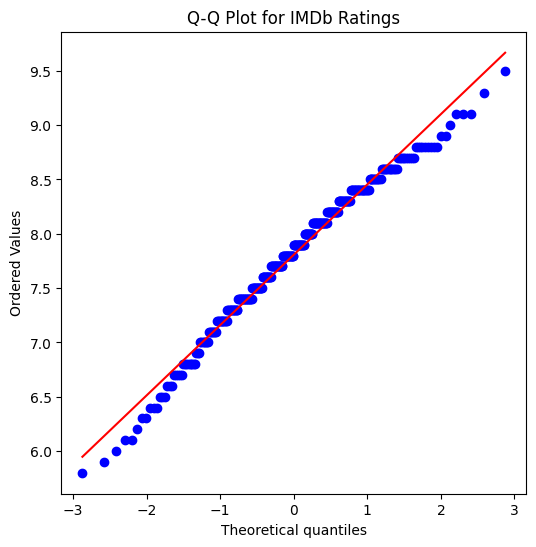

In [63]:
# 6. Normal Probability Plot (Q-Q Plot)
plt.figure(figsize=(6, 6))
probplot(data['IMDb'], dist="norm", plot=plt)
plt.title('Q-Q Plot for IMDb Ratings')
plt.show()

In [64]:
data.describe(include='all')

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
count,341,341.000000,341,341.000000,341.000000,341.0,341.000000,341.000000,341.0
unique,341,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,Requiem,NaN,16+,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,145,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2014.266862,NaN,7.807038,82.448680,1.0,0.082111,0.043988,0.0
std,NaN,7.187963,NaN,0.648671,17.179361,0.0,0.274938,0.205370,0.0
min,NaN,1959.000000,NaN,5.800000,11.000000,1.0,0.000000,0.000000,0.0
25%,NaN,2013.000000,NaN,7.400000,75.000000,1.0,0.000000,0.000000,0.0
50%,NaN,2016.000000,NaN,7.900000,87.000000,1.0,0.000000,0.000000,0.0
75%,NaN,2018.000000,NaN,8.300000,95.000000,1.0,0.000000,0.000000,0.0


In [65]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

corr_matrix = numerical_data.corr()
corr_matrix

,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
Year,1.000000,-0.274991,0.013652,NaN,-0.514155,-0.386532,NaN
IMDb,-0.274991,1.000000,0.330262,NaN,0.164964,0.114682,NaN
Rotten Tomatoes,0.013652,0.330262,1.000000,NaN,0.028916,-0.033954,NaN
Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hulu,-0.514155,0.164964,0.028916,NaN,1.000000,0.456736,NaN
Prime Video,-0.386532,0.114682,-0.033954,NaN,0.456736,1.000000,NaN
Disney+,NaN,NaN,NaN,NaN,NaN,NaN,NaN


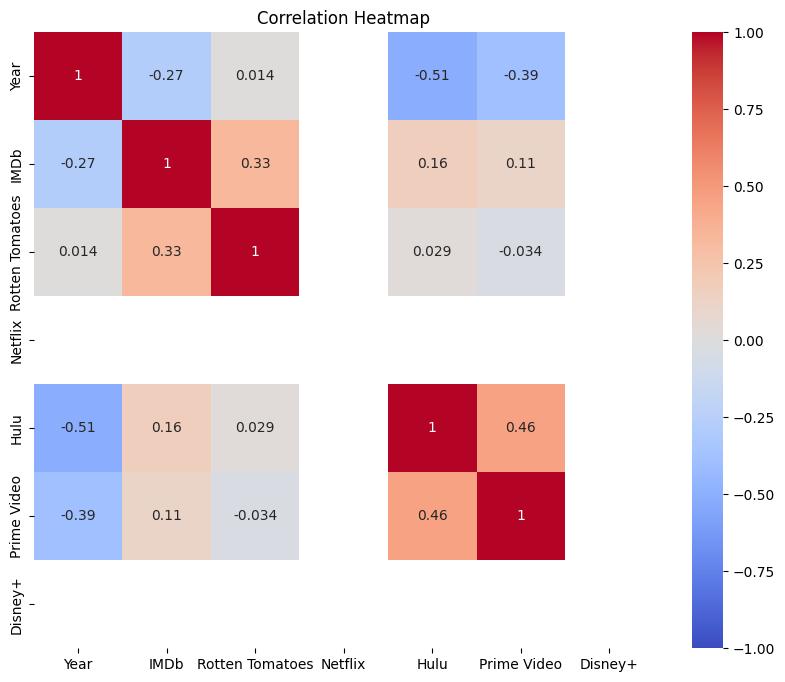

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

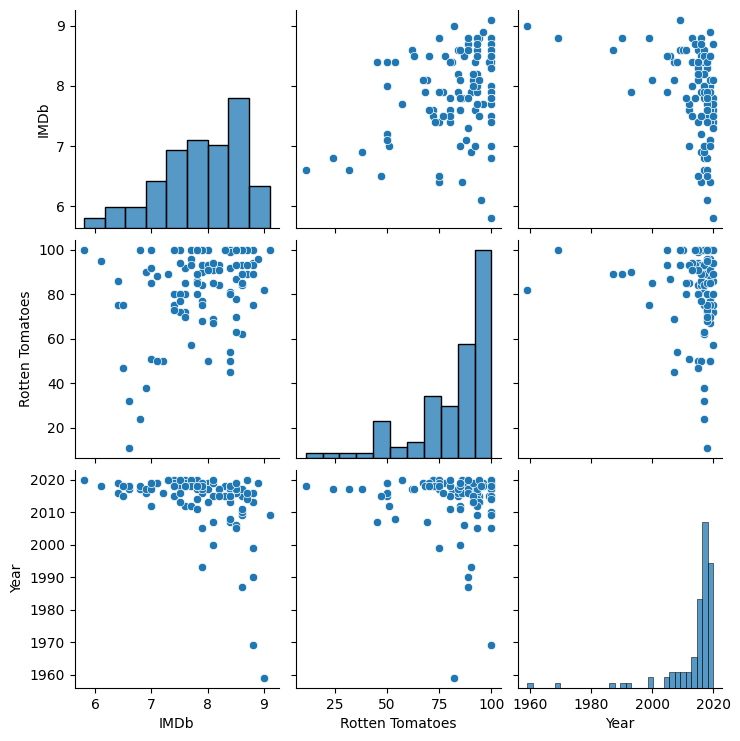

In [67]:
sample_df = data.sample(100)
sns.pairplot(sample_df[['IMDb', 'Rotten Tomatoes', 'Year']])
plt.show()

In [68]:
# for two-sample t-test
# 9. Hypothesis Testing
# Null Hypothesis: H0: mean IMDb ratings for Netflix = mean IMDb ratings for Hulu
# Alternative Hypothesis: H1: mean IMDb ratings for Netflix ≠ mean IMDb ratings for Hulu

netflix_ratings = data[data['Netflix'] == 1]['IMDb']
hulu_ratings = data[data['Hulu'] == 1]['IMDb']

t_stat, p_value = stats.ttest_ind(netflix_ratings, hulu_ratings)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -2.8070927081413073, P-value: 0.005265925166177134


In [69]:
# alpha values
alpha_values = [0.01, 0.05, 0.1]

type_i_errors = []

for alpha in alpha_values:
    # Perform the two-sample t-test
    t_stat, p_value = ttest_ind(netflix_ratings, hulu_ratings)

    if p_value < alpha:
        type_i_errors.append(True)
    else:
        type_i_errors.append(False)

for alpha, error in zip(alpha_values, type_i_errors):
    print(f"Type I Error at alpha = {alpha} : { \
        'Rejected H0' if error else 'Failed to reject Null Hypothesis' \
    }")

Type I Error at alpha = 0.01 : Rejected H0
Type I Error at alpha = 0.05 : Rejected H0
Type I Error at alpha = 0.1 : Rejected H0


In [70]:
z_score = norm.ppf((1 + 0.95) / 2)
std_dev = data['IMDb'].std()
sample_size = len(data['IMDb'])

margin_of_error = z_score * (std_dev / np.sqrt(sample_size))
print(f"Margin of Error: {margin_of_error}")

Margin of Error: 0.06884862506268202


In [71]:
# Linear Regression
from scipy import stats
import pprint

X = data['Rotten Tomatoes']
y = data['IMDb']

print(X.shape)
print(y.shape)

slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

pprint.pp({
    "slope": slope,
    "intercept": intercept,
    "r_value": r_value,
    "p_value": p_value,
    "std_err": std_err,
    "r_squared": r_value ** 2,
})

(341,)
(341,)
{'slope': np.float64(0.0124702899902693),
 'intercept': np.float64(6.778879169863867),
 'r_value': np.float64(0.3302624440017858),
 'p_value': np.float64(4.036737518161267e-10),
 'std_err': np.float64(0.001935702027602389),
 'r_squared': np.float64(0.10907328191803269)}


In [72]:
predictions = intercept + slope * X
mse = np.mean((y - predictions) ** 2)
rmse = np.sqrt(mse)

pprint.pp({
    "mse": float(mse),
    "rmse": float(rmse),
})

{'mse': 0.37377931301591927, 'rmse': 0.6113749365290658}


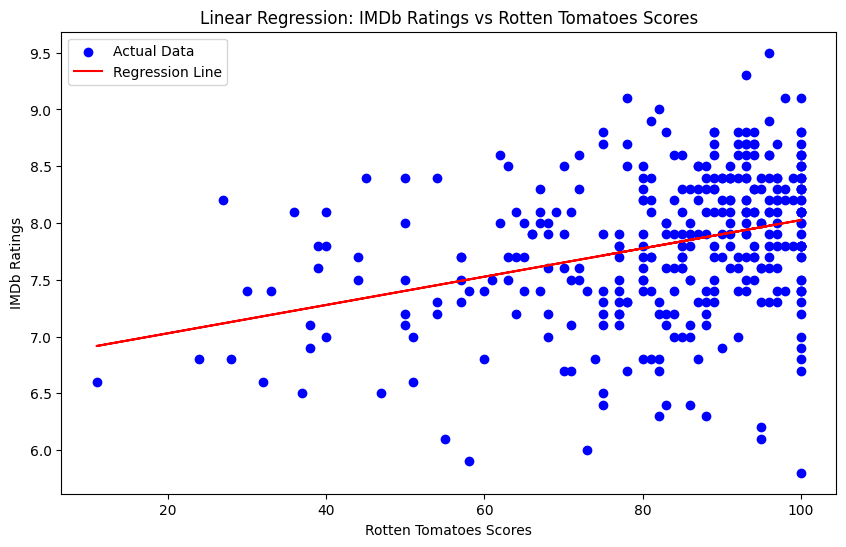

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, predictions, color='red', label='Regression Line')
plt.title('Linear Regression: IMDb Ratings vs Rotten Tomatoes Scores')
plt.xlabel('Rotten Tomatoes Scores')
plt.ylabel('IMDb Ratings')
plt.legend()
plt.show()

In [74]:
# Prediction tests
test_rt_scores = [25, 60, 78, 92, 100]
predicted_imdb_ratings = [float(intercept + slope * score) for score in test_rt_scores]
print(predicted_imdb_ratings)

[7.0906364196205995, 7.527096569280025, 7.751561789104873, 7.926145848968643, 8.025908168890798]


In [75]:
#12. Feature engineering
def age_group(age_rating):
    if age_rating in ['G', 'PG']:
        return 'Children'
    elif age_rating == 'PG-13':
        return 'Teen'
    elif age_rating in ['R', 'NC-17']:
        return 'Adult'
    else:
        return 'Unrated'

data['Age_Group'] = data['Age'].apply(age_group)


data['Platform_Availability_Count'] = data[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum(axis=1)
print(data.head())

              Title  Year  Age  IMDb  Rotten Tomatoes  Netflix  Hulu  \
0      Breaking Bad  2008  18+   9.5               96        1     0   
1   Stranger Things  2016  16+   8.8               93        1     0   
2       Money Heist  2017  18+   8.4               91        1     0   
3          Sherlock  2010  16+   9.1               78        1     0   
4  Better Call Saul  2015  18+   8.7               97        1     0   

   Prime Video  Disney+ Age_Group  Platform_Availability_Count  
0            0        0   Unrated                            1  
1            0        0   Unrated                            1  
2            0        0   Unrated                            1  
3            0        0   Unrated                            1  
4            0        0   Unrated                            1  


In [76]:
data.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Age_Group,Platform_Availability_Count
0,Breaking Bad,2008,18+,9.5,96,1,0,0,0,Unrated,1
1,Stranger Things,2016,16+,8.8,93,1,0,0,0,Unrated,1
2,Money Heist,2017,18+,8.4,91,1,0,0,0,Unrated,1
3,Sherlock,2010,16+,9.1,78,1,0,0,0,Unrated,1
4,Better Call Saul,2015,18+,8.7,97,1,0,0,0,Unrated,1
